In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Matplotlib is building the font cache; this may take a moment.


In [5]:
# define inputs
quality = ctrl.Antecedent(np.arange(0,6,1), 'quality')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')

# define output
tip = ctrl.Consequent(np.arange(0,21,1), 'tip')

In [14]:
# FUZZIFICATION
# create membership functions

# auto generate quality and service with 3 membership functions each
quality.automf(3)
service.automf(3)

In [6]:
# manually create membership function for tip
# use 'trimf' basic triangle
tip['low'] = fuzz.trimf(tip.universe, [0,0,10.5])
tip['medium'] = fuzz.trimf(tip.universe, [0,10.5,20])
tip['high'] = fuzz.trimf(tip.universe, [10.5,20,20])

C:\Users\henry\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


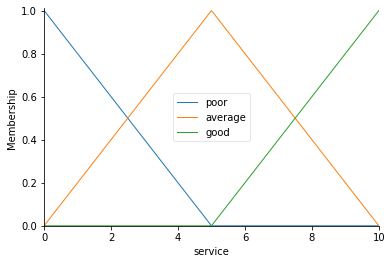

In [15]:
# check fuzzy subsets and membership functions
%matplotlib inline

service.view()

C:\Users\henry\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


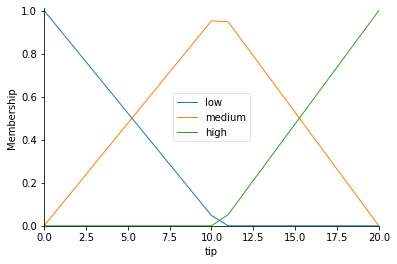

In [16]:
tip.view()

In [17]:
# INFERENCE 
# define fuzzy rules
# rule 1: for low tip
# rule 2: for medium tip
# rule 3: for high tip
# rule 4: when the waiter is cool but food sucks but you feel bad for the waiter
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule2 = ctrl.Rule(quality['average'] & service['average'], tip['medium'])
rule3 = ctrl.Rule(quality['good'] & service['good'], tip['high'])
rule4 = ctrl.Rule(quality['poor'] & service['good'], tip['high'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

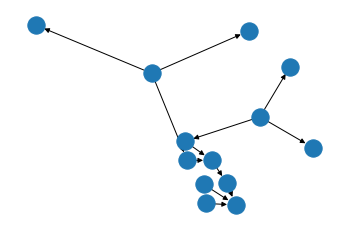

In [18]:
rule1.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

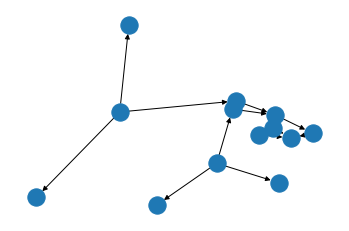

In [19]:
rule4.view()